In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

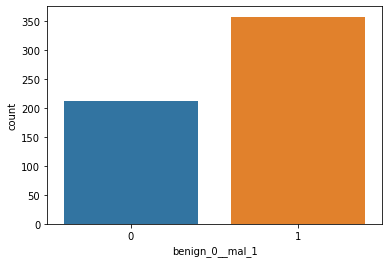

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

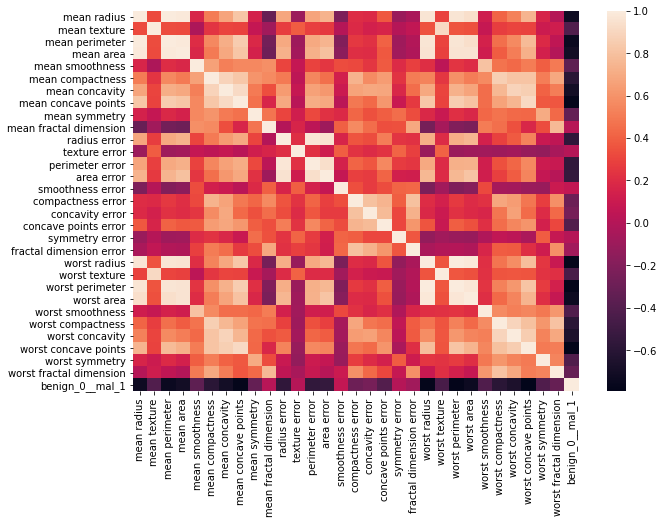

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())

#We observe large negative correlation values with a lot of the variable. Good for the model.

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='mean radius'>

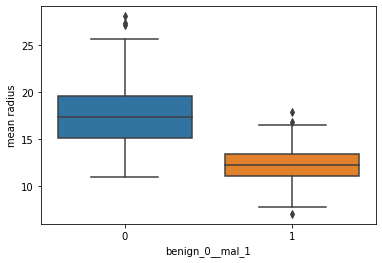

In [26]:
sns.boxplot(x='benign_0__mal_1',y='mean radius',data=df)

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='mean area'>

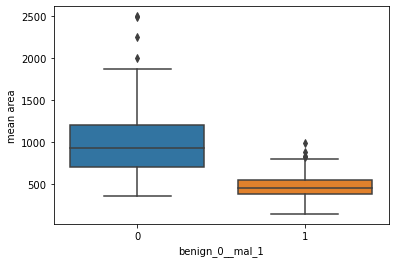

In [28]:
sns.boxplot(x='benign_0__mal_1',y='mean area',data=df)

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='mean texture'>

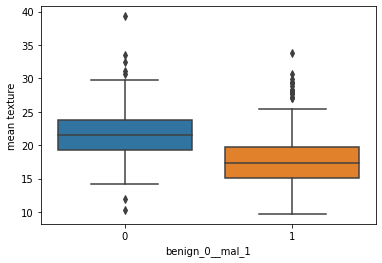

In [29]:
sns.boxplot(x='benign_0__mal_1',y='mean texture',data=df)

# Data preprocessing

In [15]:
X = df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model creation

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
X_train.shape

(426, 30)

In [33]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary Classification -> Sigmoid Activation
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [34]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6815 - val_loss: 0.6668
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6549 - val_loss: 0.6384
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6240 - val_loss: 0.6114
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5993 - val_loss: 0.5756
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5602 - val_loss: 0.5277
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5169 - val_loss: 0.4767
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4635 - val_loss: 0.4222
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4017 - val_loss: 0.3742
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3689 - val_loss: 0.3303
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3295 - val_loss: 0.2966
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.1133
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0520 - val_loss: 0.1172
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0634 - val_loss: 0.1117
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.1256
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0523 - val_loss: 0.1182
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.1122
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0454 - val_loss: 0.1178
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0448 - val_loss: 0.1167
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0654 - val_loss: 0.1137
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0529 - val_loss: 0.1153
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.1294
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.1222
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0370 - val_loss: 0.1205
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.1272
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0451 - val_loss: 0.1189
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.1359
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0426 - val_loss: 0.1211
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0341 - val_loss: 0.1323
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0375 - val_loss: 0.1269
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0475 - val_loss: 0.1313
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0338 - val_loss: 0.1361
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.1323
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0338 - val_loss: 0.1359
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.1452
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0309 - val_loss: 0.1312
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.1453
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.1346
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.1283
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0238 - val_loss: 0.1392
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0496 - val_loss: 0.1481
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.1375
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.1552
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0290 - val_loss: 0.1329
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.1382
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0374 - val_loss: 0.1418
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0290 - val_loss: 0.1385
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.1407
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0346 - val_loss: 0.1413
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.1442
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.1355
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0251 - val_loss: 0.1455
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0206 - val_loss: 0.1656
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.1404
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.1619
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.1499
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.1652
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0216 - val_loss: 0.1489
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.1715
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.1467
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.1634
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.1635
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0296 - val_loss: 0.1547
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.2115
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 0.1589
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.1819
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.1620
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.1851
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.1581
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.1790
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.1635
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.1852
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.1973
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.1941
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.1967
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.1861
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.2004
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.1977
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.2030
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.2035
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.2017
Epoc

In [35]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

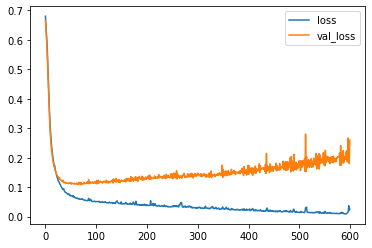

In [37]:
loss.plot()

#Using 600 epochs overfitted out model. We need to decrease the number of epochs or use early stopping!

In [43]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification -> Sigmoid Activation
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
# help(EarlyStopping)

In [50]:
# we are using the loss metric for our model. As we want to minimize the loss, we use the 'min' mode
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [51]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6845 - val_loss: 0.6494
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6427 - val_loss: 0.6113
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6022 - val_loss: 0.5669
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5628 - val_loss: 0.5233
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5159 - val_loss: 0.4725
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4730 - val_loss: 0.4200
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4006 - val_loss: 0.3700
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3779 - val_loss: 0.3253
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3236 - val_loss: 0.2903
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3099 - val_loss: 0.2645
Epoch 11

In [52]:
modelloss=pd.DataFrame(model.history.history)

<AxesSubplot:>

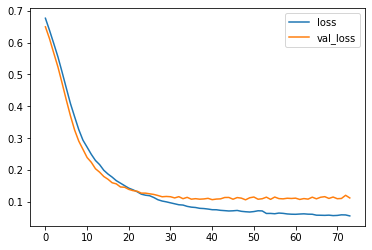

In [54]:
modelloss.plot()

# Validation loss is not increasing, so we are good!

In [56]:
# Let's try using Dropout layers

In [57]:
from tensorflow.keras.layers import Dropout

In [58]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Binary Classification -> Sigmoid Activation
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [59]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.7279 - val_loss: 0.6625
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6691 - val_loss: 0.6378
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6646 - val_loss: 0.6174
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6433 - val_loss: 0.5942
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6029 - val_loss: 0.5667
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5822 - val_loss: 0.5355
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5441 - val_loss: 0.4928
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5301 - val_loss: 0.4581
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5390 - val_loss: 0.4295
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5076 - val_loss: 0.4032
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1442 - val_loss: 0.1126
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1365 - val_loss: 0.1081
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1341 - val_loss: 0.1151
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1218 - val_loss: 0.1079
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1037 - val_loss: 0.1072
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1618 - val_loss: 0.1199
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1214 - val_loss: 0.1218
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1269 - val_loss: 0.1147
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1306 - val_loss: 0.1122
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1146 - val_loss: 0.1137
Epoch 93/600


In [60]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

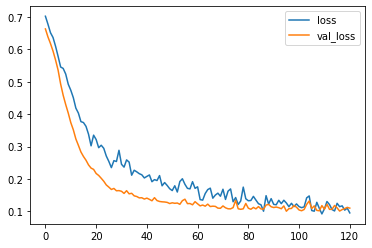

In [61]:
model_loss.plot()

# Model evaluation

In [70]:
predictions=model.predict(X_test) > 0.5

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

       False       0.98      0.95      0.96        57
        True       0.97      0.99      0.98        86

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [74]:
print(confusion_matrix(predictions,y_test))

[[54  3]
 [ 1 85]]
